### Linear Programming

1. History
    - Simplex Method: exponential time in worst case but polynomial time in average, usually very fast.
    - Ellipsoid Method: the first polynoimal time in worst case for LP.
    - Interior Point Method: polynoimal time in worst case.

2. Duality
    - Primal Form:
    $$
    \begin{align}
    \max_{\bold{x}} \quad& {\bold{c} \cdot \bold{x}} \\
    s.t. \quad& \bold{A}\bold{x} \le \bold{b} \\
    & \bold{x} \ge \bold{0}
    \end{align}
    $$
    - Dual Form:
    $$
    \begin{align}
    \min_{\bold{y}} \quad& {\bold{b} \cdot \bold{y}} \\
    s.t. \quad& \bold{A}^T\bold{y} \ge \bold{c} \\
    & \bold{x} \ge \bold{0}
    \end{align}
    $$

3. Application
    - Multi-Commodity Max Flow: $\sum_{i}f_i(u, v) \le c(u, v)$ (capacity constraint).
    - Single Source Shortest Path: $d(v) - d(u) \le w(u, v)$ (triangular inequality) since $d(v) = \min_{(u, v) \in G} d(u) + w(u, v)$. The objective function should be $\max d(v)$.

4. Simplex Method
    - Introducing basic variables (slack variables) for both the objective function and inequality constraints.
    - Basic Solution: A value of $\bold{x}$ with all non-basic variables $0$.
    - Pivoting (swap basic and non-basic variables):
        - select a non-basic variable $x_e$ whose coefficient in the objective function is positive;
        - increase the value of $x_e$ as much as possible without violating any of the constraints;
        - $x_e$ becomes basic, some becomes non-basic (depending on whether they are $0$).
    - $C_{n + m}^{n}$ iterations in worst case.

### Complexity
```
             NP-complete             
                  |                  
easy --------------------------> hard
     |     NP     |  NP-hard   |     
     |  P  |             | EXP |     
```

NP-complete problems are the easiest NP-hard and the hardest NP. Known NP-complete includes 3-SAT, 3-Dimensional-Matching, Subset-Sum, etc.

weak-NP-hard: NP if the input value (not size) is polynomial.

### problem 8-1

1. See the plot below.
2. 
    - Standard Form:
    $$
    \begin{align}
    \max_{x_1, x_2}\quad & 4x_1 + x_2 \\
    s.t. \quad & x_1 + x_2 \le 10 \\
    & 4x_1 - x_2 \le 20 \\
    & x_1 + 3x_2 \le 24 \\
    & x_1, x_2 \ge 0
    \end{align}
    $$
    - Slack Form:
    $$
    \begin{align}
    z & = 4x_1 + x_2 \\
    x_3 & = 10 - x_1 - x_2 \\
    x_4 & = 20 - 4x_1 + x_2 \\
    x_5 & = 24 - x_1 - 3x_2
    \end{align}
    $$

3. 
    - basic solution: $(0, 0, 10, 20, 24)$, choose $x_1 = 5$:
    $$
    \begin{align}
    z &= 20 + 2x_2 - x_4\\
    x_1 &= 5 + \frac{x_2}{4} - \frac{x_4}{4} \\
    x_3 &= 5 - \frac{5x_2}{4} + \frac{x_4}{4} \\
    x_5 &= 19 - \frac{13x_2}{4} + \frac{x_4}{4}
    \end{align}
    $$
    - basic solution: $(5, 0, 5, 0, 19)$, choose $x_2 = 4$:
    $$
    \begin{align}
    z &= 28 - \frac{8x_3}{5} - \frac{3x_4}{5} \\
    x_1 &= 6 - \frac{x_3}{5} -\frac{x_4}{5} \\
    x_2 &= 4 - \frac{4x_3}{5} + \frac{x_4}{5} \\
    x_5 &= 6 + \frac{13x_3}{5} - \frac{2x_4}{5}
    \end{align}
    $$
    - basic solution: $(6, 4, 0, 0, 6)$, optimal $z = 28$.

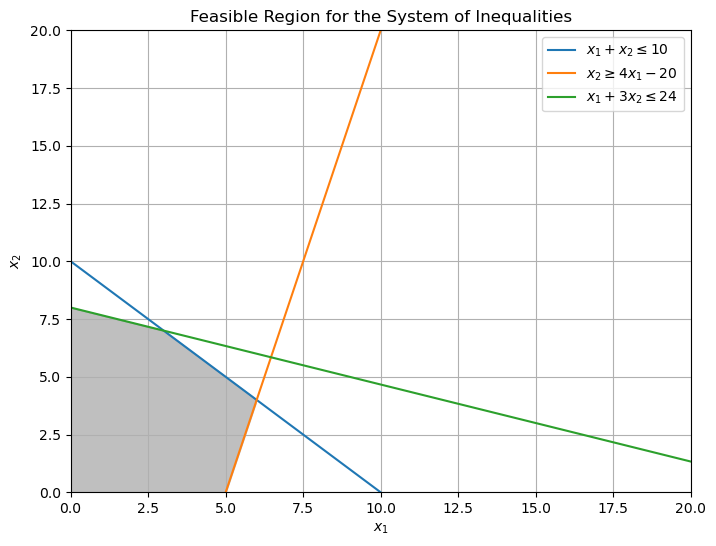

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0, 20, 400)

x2_1 = 10 - x1
x2_2 = 4 * x1 - 20
x2_3 = (24 - x1) / 3

plt.figure(figsize=(8, 6))

plt.fill_between(x1, np.maximum(x2_2, 0), np.minimum(np.minimum(x2_1, x2_3), 20), where=(x1+x2_2 <= 10) & (x1+3*x2_3 >= 24), color='gray', alpha=0.5)

plt.plot(x1, x2_1, label=r'$x_1 + x_2 \leq 10$')
plt.plot(x1, x2_2, label=r'$x_2 \geq 4x_1 - 20$')
plt.plot(x1, x2_3, label=r'$x_1 + 3x_2 \leq 24$')

plt.xlim((0, 20))
plt.ylim((0, 20))
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')

plt.legend()

plt.title('Feasible Region for the System of Inequalities')
plt.grid(True)
plt.show()

### problem 8-2

1. It's NP: Given three possible solutions, you can tell whether they are distinct and satisfy the formula $\phi$ in polynomial time. It's NP-hard: Suppose the formula for a 3-SAT problem is $\phi$, whose variables are $\{x_1, x_2, \cdots, x_n\}$, we create a formula $\phi' = \phi \wedge (x_{n + 1} \vee x_{n + 2})$. $\phi'$ has at least three solutions if and only if $\phi$ is feasible. TRIPLE-SAT is NP-complete.

2. For each variable $x_i$ in $\phi$, we create two connected vertices $x_i$ and $\bar{x}_i$ with $p = 1$ (We cannot choose both a variable and its negation). For each clause $c_j$ in $\phi$, we connect its literals (We can get at most $1$ profit in each clause). Let $k$ be the number of clauses in $\phi$. If there's a polynomial-time algorithm, then all NP problem can be reduced to this problem in polynomial time and thus be solved in polynomial time. P=NP.

3. Given an integer $k$ and a set of $n$ tasks $A =\{a_1, a_2, \cdots, a_n\}$, determine whether the machine can reach the total profit of $k$. It's NP: You can tell whether a selected task set $B = \{b_1, b_2, \cdots, b_m\} \subset A$ is disjoint (greedy: early deadline first) and has total profit $\ge k$. It's NP-hard: We reduce Subset-Sum to it. For each element $s_i\in S$ and a target sum $t$, we create a task $a_i$ with $p_i = s_i$, $t_i = s_i$ and $d_i = t$.